In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, plot_roc_curve,confusion_matrix

In [3]:
n = 2   # length of n-gram
dir = "./info_gain"#f"{n}grams"
infogain_file_prefix = "ngram_info" #f"{n}gram_info"
train_data_file = "temp_csvs/ngram_presence_train.csv" #f"{n}grams/{n}gram_presence_train.csv"
test_data_file = "temp_csvs/ngram_presence_test.csv" #f"{n}grams/{n}gram_presence_test.csv"
obfuscated_file = "temp_csvs/obfuscated_presence.csv"

In [4]:
n_best = 1000 # number of best ngrams to keep

In [5]:
files = [file for file in sorted(os.walk(dir))[0][2] if infogain_file_prefix in file]
files

['ngram_info_gain_3-5000_2021-06-16_21-20-09.csv',
 'ngram_info_gain_5001-10000_2021-06-16_21-27-42.csv',
 'ngram_info_gain_10001-15000_2021-06-16_21-35-43.csv',
 'ngram_info_gain_15001-20000_2021-06-16_21-43-43.csv',
 'ngram_info_gain_20001-25000_2021-06-16_21-51-43.csv',
 'ngram_info_gain_25001-30000_2021-06-16_21-59-46.csv',
 'ngram_info_gain_30001-35000_2021-06-16_22-07-52.csv',
 'ngram_info_gain_35001-40000_2021-06-16_22-16-03.csv',
 'ngram_info_gain_40001-45000_2021-06-16_22-24-16.csv',
 'ngram_info_gain_45001-50000_2021-06-16_22-32-39.csv',
 'ngram_info_gain_50001-55000_2021-06-16_22-41-07.csv',
 'ngram_info_gain_55001-60000_2021-06-16_22-49-38.csv',
 'ngram_info_gain_60001-65535_2021-06-16_22-58-14.csv']

In [6]:
ngrams = []
infogains = []
for file in files:
    with open(dir + "/" + file) as f:
        lines = f.read().splitlines()
        ngrams += lines[0].split(",")
        infogains += [float(num) for num in lines[1].split(",")]

In [7]:
infogains_sorted = sorted(infogains)
threshold = infogains_sorted[-n_best-1]
ngrams_best = []

for infogain, ngram in zip(infogains, ngrams):
    if infogain > threshold:
        ngrams_best.append(ngram)

Text(0, 0.5, 'Information gain')

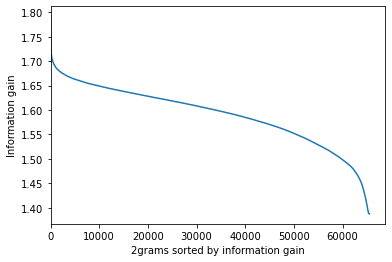

In [8]:
plt.plot(infogains_sorted[::-1])
plt.xlim([0, None])
plt.xlabel("2grams sorted by information gain")
plt.ylabel("Information gain")
#plt.axvline(n_best, ls="dashed", c="k")

In [9]:
dataset = pd.read_csv(train_data_file, usecols=["file", "class"]+ngrams_best)
dataset.head()

,file,class,f66d,67b2,dbe2,5a6d,ff97,fed0,f4c7,5288,...,5779,f37e,51bb,965e,95e6,decd,fe9b,afae,ecc7,ef60
0,VirusShare_000573bf13fea074b3ec2e36dba57932,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,VirusShare_001ff834ff8abb42314d782fa79605b6,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,VirusShare_00202a5a32a76b73525d72b044898664,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,VirusShare_0026837efde126f59238b7452d1a01c2,1,0,0,1,1,0,0,1,0,...,1,0,1,1,1,0,1,1,1,1
4,VirusShare_00275dd947649594fc50e0197f6ee3d5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dataset_test = pd.read_csv(test_data_file, usecols=["file", "class"]+ngrams_best)
dataset_test.head()

,file,class,f66d,67b2,dbe2,5a6d,ff97,fed0,f4c7,5288,...,5779,f37e,51bb,965e,95e6,decd,fe9b,afae,ecc7,ef60
0,VirusShare_0008ce316ab158232a488f3b7b4b65e3,1,0,1,1,0,1,0,1,1,...,1,1,1,0,1,0,0,1,1,1
1,VirusShare_001fd7ade105f27faeb461e9782a63e8,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,VirusShare_006c48d6dbddbc0cd9c16b36c1da5da0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,VirusShare_007c4edc6e1ca963a9b2e05e136142f2,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,VirusShare_0089c7cb5f4f84c1d18024fe69314ec0,1,0,0,0,1,0,0,1,0,...,1,0,1,1,0,0,0,0,1,0


In [11]:
dataset_obfuscated = pd.read_csv(obfuscated_file, usecols=["file", "class"]+ngrams_best)
dataset_obfuscated.head()

,file,class,fc88,f15e,c2a3,965e,be6c,5d89,df43,e147,...,d2c8,4ee0,e342,e61f,fe2c,5162,f356,659d,cb56,5a79
0,libz.dll,0,0,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1,B330.dll,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,1
2,BackgroundActivatorDLL.dll,0,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,BackgroundMediaPolicy.dll,0,0,0,0,0,0,0,1,1,...,1,1,1,0,1,1,0,0,1,1
4,BackupRestore.dll,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
print("Training benign:", len(dataset[dataset["class"]==0]))
print("Training malware:", len(dataset[dataset["class"]==1]))

print("Test benign:", len(dataset_test[dataset_test["class"]==0]))
print("Test malware:", len(dataset_test[dataset_test["class"]==1]))

Training benign: 25524
Training malware: 27213
Test benign: 3285
Test malware: 6323


In [13]:
X_train = dataset.drop('file', axis='columns').drop('class', axis='columns')
y_train = dataset['class']

X_test = dataset_test.drop('file', axis='columns').drop('class', axis='columns')
y_test = dataset_test['class']

X_obfuscated = dataset_obfuscated.drop('file', axis='columns').drop('class', axis='columns')
y_obfuscated = dataset_obfuscated['class']

In [23]:
param_grid_ = {'hidden_layer_sizes': [100, 500, 1000]
                #'learning_rate': ["constant", "invscaling"]
              }

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

clf_base = MLPClassifier(random_state=41, max_iter=500)

grid_search = GridSearchCV(estimator=clf_base,
                            cv=kfold,
                            param_grid=param_grid_,
                            n_jobs=8,  # jobs to run in parallel
                            verbose=1,
                            scoring="balanced_accuracy")

grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

# how does it decide which one is best?
print("Best estimator:")
print(clf)

y_pred = clf.predict(X_test)
score_acc = accuracy_score(y_test, y_pred)
score_prec = precision_score(y_test, y_pred)
score_rec = recall_score(y_test, y_pred)
score_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", score_acc)
print("Precision:", score_prec)
print("Recall:", score_rec)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed: 25.3min finished


Best estimator:
MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=41)
Accuracy: 0.9208992506244796
Precision: 0.9476903267342669
Recall: 0.931203542622173


In [25]:
clf_best = clf

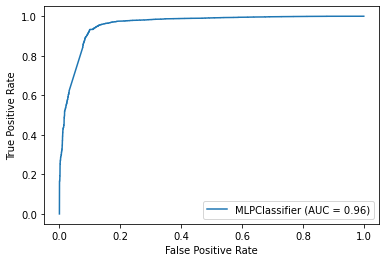

In [26]:
plot_roc_curve(clf_best, X_test, y_test)

In [19]:
clf = MLPClassifier(hidden_layer_sizes=500, max_iter=500, random_state=41)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:,1]

score_acc = accuracy_score(y_test, y_pred)
score_prec = precision_score(y_test, y_pred)
score_rec = recall_score(y_test, y_pred)
score_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", score_acc)
print("Precision:", score_prec)
print("Recall:", score_rec)
print(confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_scores)
#plot_roc_curve(clf, X_test, y_test) 

Accuracy: 0.9208992506244796
Precision: 0.9476903267342669
Recall: 0.931203542622173
[[2960  325]
 [ 435 5888]]


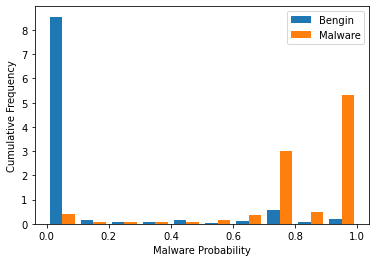

In [26]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
plt.figure()
plt.hist([y_pred_proba[y_test == 0], y_pred_proba[y_test == 1]], #histtype = 'step',
density = True, bins = 10, label = ["Bengin", "Malware"]);
plt.xlabel("Malware Probability")
plt.ylabel("Cumulative Frequency")
plt.legend(loc = 'upper right')
#plt.ylim(0,1.2)

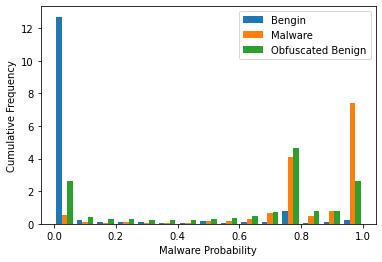

In [21]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_proba_obf = clf.predict_proba(X_obfuscated)[:,1]
plt.figure()
plt.hist([y_pred_proba[y_test == 0], y_pred_proba[y_test == 1], y_pred_proba_obf], #histtype = 'step',
density = True, bins = 15, cumulative = False, label = ["Bengin", "Malware", "Obfuscated Benign"]);
plt.xlabel("Malware Probability")
plt.ylabel("Cumulative Frequency")
plt.legend(loc = 'upper right')
#plt.ylim(0,1.2)

In [18]:
X_obfuscated_train, X_obfuscated_test, y_obfuscated_train, y_obfuscated_test = train_test_split(X_obfuscated, y_obfuscated, 
test_size=0.66, random_state=40)

X_train_obfuscated = pd.concat([X_train, X_obfuscated_train])
y_train_obfuscated = pd.concat([y_train, y_obfuscated_train])

X_test_obfuscated = X_test
y_test_obfuscated = y_test
#X_test_obfuscated = pd.concat([X_test, X_obfuscated_test])
#y_test_obfuscated = pd.concat([y_test, y_obfuscated_test])


clf_obfs = MLPClassifier(hidden_layer_sizes=750, max_iter=750, random_state=42)
clf_obfs.fit(X_train_obfuscated, y_train_obfuscated)


y_pred = clf_obfs.predict(X_test_obfuscated)

score_acc = accuracy_score(y_test_obfuscated, y_pred)
score_prec = precision_score(y_test_obfuscated, y_pred)
score_rec = recall_score(y_test_obfuscated, y_pred)
score_auc = roc_auc_score(y_test_obfuscated, y_pred)
print("Accuracy:", score_acc) 
print("Precision:", score_prec)
print("Recall:", score_rec)
print(confusion_matrix(y_test_obfuscated, y_pred))

Accuracy: 0.9057035803497085
Precision: 0.9384814634936053
Recall: 0.9168116400442827
[[2905  380]
 [ 526 5797]]


0.9161344958164137


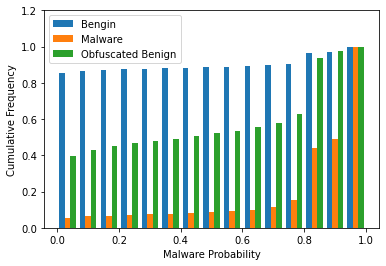

In [27]:
y_pred_proba = clf_obfs.predict_proba(X_test)[:,1]
y_pred_proba_obf = clf_obfs.predict_proba(X_obfuscated_test)[:,1]
plt.figure()
plt.hist([y_pred_proba[y_test == 0], y_pred_proba[y_test == 1], y_pred_proba_obf], #histtype = 'step',
density = True, bins = 15, cumulative = True, label = ["Bengin", "Malware", "Obfuscated Benign"]);
plt.xlabel("Malware Probability")
plt.ylabel("Cumulative Frequency")
plt.legend(loc = 'upper left')
plt.ylim(0,1.2)

score_auc = roc_auc_score(y_test, y_pred)
print(score_auc)

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(1000,500), max_iter=500, random_state=41)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score_acc = accuracy_score(y_test, y_pred)
score_prec = precision_score(y_test, y_pred)
score_rec = recall_score(y_test, y_pred)
score_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", score_acc)
print("Precision:", score_prec)
print("Recall:", score_rec)
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.923917568692756
Precision: 0.9375586854460094
Recall: 0.9474932785070378
[[2886  399]
 [ 332 5991]]


In [91]:
clf = MLPClassifier(hidden_layer_sizes=1000, max_iter=500, random_state=41)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score_acc = accuracy_score(y_test, y_pred)
score_prec = precision_score(y_test, y_pred)
score_rec = recall_score(y_test, y_pred)
score_auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", score_acc)
print("Precision:", score_prec)
print("Recall:", score_rec)

Accuracy: 0.9604869713797523
Precision: 0.9615108430274307
Recall: 0.9849933794321024


Decision Tree
Accuracy: 0.8618859283930058
Precision: 0.9076370757180157
Recall: 0.8796457377826981
[[2719  566]
 [ 761 5562]]

Boosted Decision Tree
Accuracy: 0.8860324729392173
Precision: 0.9281035047494268
Recall: 0.8962517792187253
[[2846  439]
 [ 656 5667]]

Random Forest
Accuracy: 0.9013322231473772
Precision: 0.9425325209945661
Recall: 0.9052664874268543
[[2936  349]
 [ 599 5724]]

Neural Network
Accuracy: 0.9112198168193172
Precision: 0.9474803664921466
Recall: 0.9158627233907956
[[2964  321]
 [ 532 5791]]



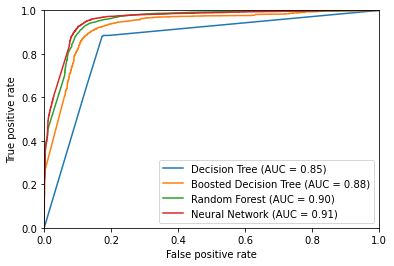

In [14]:
n=2
classifier_names = ['Decision Tree',
                    'Boosted Decision Tree',
                    'Random Forest',
                    'Neural Network']

# Using mostly default parameters here but can be varied e.g. learning rate or regularisation amount, models are quite robust
classifiers = [DecisionTreeClassifier(random_state=43), 
               GradientBoostingClassifier(random_state=42),
               RandomForestClassifier(random_state=42), 
               MLPClassifier(max_iter=500, random_state=41)]    # report: random_state=41

#plt.figure(figsize=(6,6))
plt.figure()
for clf, name in zip(classifiers, classifier_names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    score_acc = accuracy_score(y_test, y_pred)
    score_prec = precision_score(y_test, y_pred)
    score_rec = recall_score(y_test, y_pred)
    score_auc = roc_auc_score(y_test, y_pred)

    print(name)
    print("Accuracy:", score_acc)
    print("Precision:", score_prec)
    print("Recall:", score_rec)
    print(confusion_matrix(y_test, y_pred))
    print("")

    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred_proba)
    '''
    with open(f"{n}grams_results/roc_{name}_random.txt", "w") as f:
        f.write("fpr1:\n")
        f.write(str(fpr))
        f.write("\n")
        f.write("tpr1:\n")
        f.write(str(tpr))
        f.write("\n")
    '''
    plt.plot(fpr, tpr, label=f"{name} (AUC = {score_auc:.2f})")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.axis("scaled")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()

#plt.savefig(f"{n}grams_results/roc_random.pdf")
#plt.savefig(f"{n}grams_results/roc_random.svg")
#plt.savefig(f"{n}grams_results/roc_random.png")

In [82]:
# this is using the predicted probabilities of the last model in the list, should make it use the best one
with open(f"{n}grams_results/{n}grams_pred_proba.csv", "w") as f:
    for binary_file, pred_proba in zip(dataset_test["file"], y_pred_proba):
        f.write(binary_file + "," + str(pred_proba) + "\n")